# <center> Раздел 2. Модуль 5. Визуализация данных

In [1]:
import pandas as pd
#используем объединенный датасет о заболеваемости и вакцинации
covid_df = pd.read_csv('data/covid_df.csv') 
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


## <center> Графические возможности библиотеки seaborn
    

Seaborn - надстройка над библиотекой matplotlib, которая значительно расширяет ее возможности, позволяя создавать графики более высокого уровня с приятным для глаза оформлением. Библиотека дает большое количество дополнительных возможностей для творчества при визуализации данных.

In [5]:
#!pip install seaborn

Традиционно seaborn импортируется под псевдонимом sns:

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.__version__

'0.11.1'

В данном разделе мы будем сравнивать несколько стран: Россию, Австралию, Германию, Канаду и Великобританию. Создадим специальный DataFrame croped_covid_df для этих данных. 

Для того, чтобы показатели по странам стали сопоставимы: добавим информацию о населении стран, чтобы рассчитать ежедневную заболеваемость на 100 человек населения (заболеваемость в процентах от населения):

In [4]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()


,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


Начнем с гистограммы. Для визуализации гистограмм в библиотеке seaborn используется метод **histplot()**.
У данного метода (как и у всех в библиотеке seaborn) есть огромнейшее количество параметров. Мы приведем основные из них:
* data - DataFrame, по которому строим график
* x - признак, который будет отложен по оси абсцисс
* y - признак, который будет отображаться по оси ординат
* hue - группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит его использовать для гистограмм, но он широко используется для других видов графиков в seaborn)
* ax - система координат matplotlib, в которой строится график
* color- цвет графика


* bins - число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул)
* kde - параметр указывает, сглаживать ли гистограмму кривой (по умолчанию False)



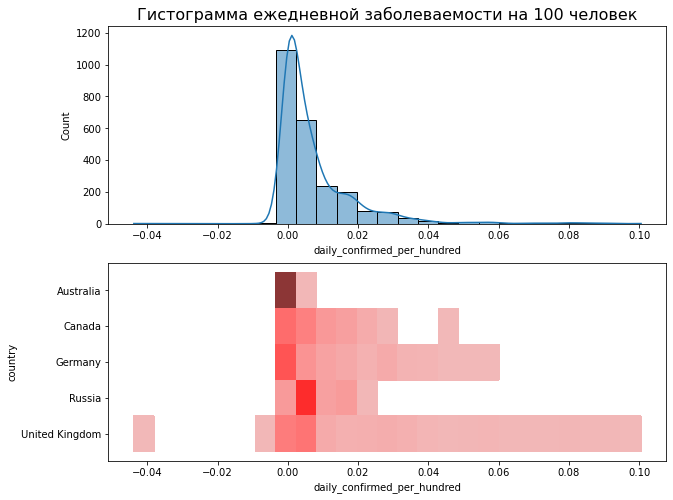

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

**ВЫВОД:** Общая гистограмма показывает, что ежедневная заболеваемость в выбранных странах не превышает 0.1 % от общего количества населения, причём большая часть наблюдений сосредоточена около 0. 

Также отчётливо видны аномалии — маленькие «пеньки», где заболеваемость отрицательная.

Гистограмма по странам показывает, какой вклад в общее распределение вносит заболеваемость в каждой из стран по отдельности. Например, ясно, что пик около нуля на общей гистограмме в основном задаётся Австралией, так как в ней ежедневная заболеваемость не превышала 0.005 % от общего числа населения (около 2 тыс. человек в день) и все наблюдения сосредоточены в двух интервалах. Чуть больший разброс по числу фиксируемых в день случаев имеет Россия, затем идут Канада, Германия и Великобритания.

Отличительной особенностью распределения для России и Великобритании является то, что для них характерен больший процент заболевших (самая тёмная отметка находится правее, чем у других стран).

Наконец, видно, что аномальная отрицательная заболеваемость принадлежит Великобритании. Об аномалиях, их поиске как с помощью визуализации, так и иными методами мы ещё будем говорить в модуле по очистке данных.

Коробчатые диаграммы в Seaborn строятся с помощью метода **boxplot()**.
* orient — ориентация диаграммы, 
* width — ширина коробок

Построим коробчатые диаграммы признака летальности (death_rate), который вы создавали ранее

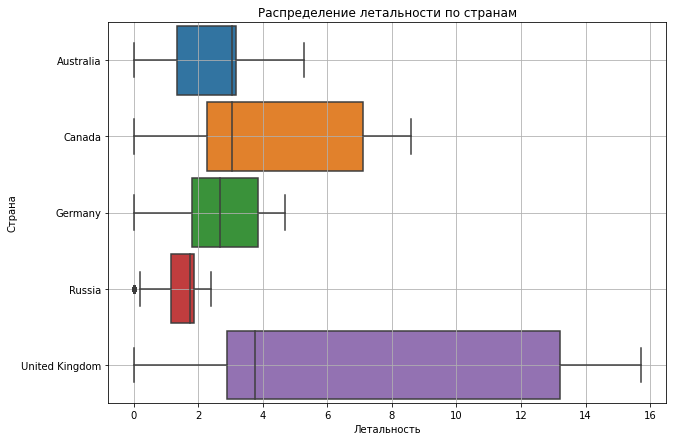

In [6]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()


**ВЫВОД:** Из выделенных стран наиболее стабильная во времени летальность от коронавируса — в России (ширина ящика наименьшая), она же является самой низкой (наименьшая медиана). Наибольший разброс имеет процент смертей в Великобритании, что объясняется вирусологами и британскими СМИ как неподготовленность страны к эпидемии в её начале, что приводило к высокой летальности. Однако, судя по тому что медианное значение летальности в стране практически совпадает со всеми остальными, можно сказать, что со временем обстановка стабилизировалась.

А теперь рассмотрим пример многоуровневой столбчатой диаграммы. С помощью нее мы можем, например, посмотреть на средний ежедневный процент заболевших в странах по кварталам.

Для построения столбчатых диаграмм в seaborn используется метод **barplot()**. 
* estimator - выбор статистической характеристики для отображения данных, по умолчанию метод отображает среднее по столбцу, который указан в параметре x
* hue - позволяет группировать данные по признаку


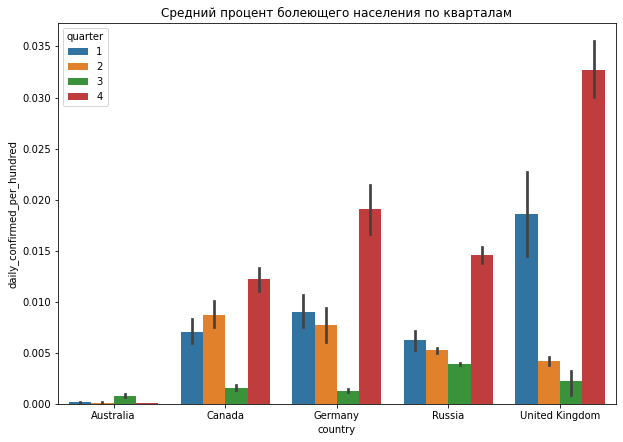

In [7]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');


**ВЫВОД:** Диаграмма показывает, как зависит средний ежедневный процент заболевших от страны и квартала. Отчётливо видно, что во всех странах (кроме Австралии), большинство людей заболевают в четвёртом квартале (октябрь, ноябрь, декабрь), когда иммунитет особенно ослаблен, а наименьшее число заболевших соответствует третьему кварталу (июль, август, сентябрь).

Построим **joinplot** на зависимость ежедневной заболеваемости в странах в проценте от населения (daily_confirmed_per_hundred) от числа полностью вакцинированных (people_fully_vaccinated_per_hundred) 
* xlim - определяет диапазон отображения оси x. 
* ylim - определяет диапазон отображения оси y. 
* height - отвечает за высоту и ширину графика (он квадратный).


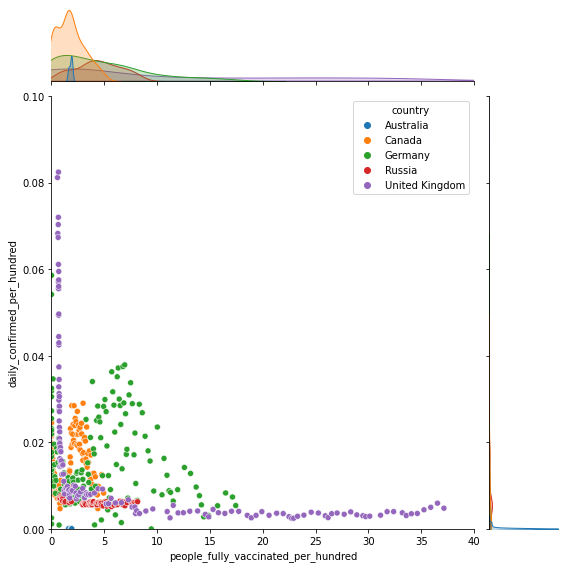

In [8]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

**ВЫВОД:** Из графика для Великобритании и России наблюдается следующая тенденция: с увеличением числа полностью привитых людей уменьшается ежедневное число заболевших. Для Канады и Германии такая же тенденция наблюдается только после достижения отметки в 7 % полностью привитого населения. Однако это может быть стечением обстоятельств, так как вирусологи говорят о необходимости полного вакцинирования 60 % населения в стране для снижения заболеваемости.

Когда мы хотим сравнить скорость изменения показателей по малому количеству категорий (в данном случае по странам их у нас их всего 5) нагляднее всего будет тепловая карта.

Предварительно создадим сводную таблицу: по столбцам отложим признак даты, а по строкам - страны, в ячейках таблицы будет находиться процент вакцинированных людей (1 ым компонентом) в стране на определенный день. Для того, чтобы даты отображались на тепловой карте верно, их необходимо привести к типу "string".


In [15]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')

display(pivot)

date,2020-12-13T00:00:00.000000000,2020-12-14T00:00:00.000000000,2020-12-15T00:00:00.000000000,2020-12-16T00:00:00.000000000,2020-12-17T00:00:00.000000000,2020-12-18T00:00:00.000000000,2020-12-19T00:00:00.000000000,2020-12-20T00:00:00.000000000,2020-12-21T00:00:00.000000000,2020-12-22T00:00:00.000000000,...,2021-05-20T00:00:00.000000000,2021-05-21T00:00:00.000000000,2021-05-22T00:00:00.000000000,2021-05-23T00:00:00.000000000,2021-05-24T00:00:00.000000000,2021-05-25T00:00:00.000000000,2021-05-26T00:00:00.000000000,2021-05-27T00:00:00.000000000,2021-05-28T00:00:00.000000000,2021-05-29T00:00:00.000000000
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


Для построения тепловой карты в seaborn используется метод **heatmap()**. Данный метод работает с табличными данными и визуализирует все ячейки таблицы с помощью цвета. 
* cmap - цветовая гамма графика.


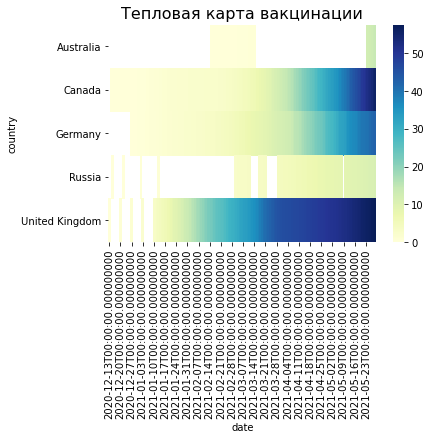

In [16]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

**ВЫВОД:** По тепловой карте легко можно судить, в каких странах темпы вакцинации выше, а в каких — ниже. Согласно легенде справа, чем ближе цвет полосы к синему, тем больше процент вакцинированных людей. Чем быстрее полоса переходит от блёклого жёлтого к насыщенному синему, тем выше темп вакцинации. Белые полосы обозначают отсутствие информации за данный период.

Так, можно судить, что наиболее активно кампания по вакцинации проходит в Великобритании: на конец периода число вакцинированных первым компонентом людей в стране превысило отметку в 50 % от общего числа населения. Гораздо менее охотно люди вакцинируются в России и Австралии: здесь число привитых на конец периода составляет около 10 % от общего числа населения.

При этом с помощью тепловой карты мы смогли увидеть, что в данных о вакцинации по России, Великобритании и Австралии содержатся пропуски, и мы даже можем узнать, за какие периоды, посмотрев на ось абсцисс.

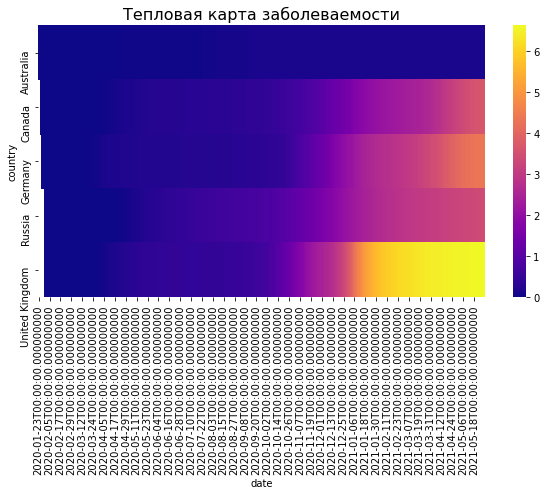

In [20]:
""" Создайте новый признак confirmed_per_hundred, который покажет процентное отношение заболевших 
вирусом к общему числу населения в странах (\(confirmed/population * 100\)).
Постройте тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа 
населения (confirmed_per_hundred) в странах из таблицы croped_covid_df."""

croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed']/croped_covid_df['population'] * 100
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Тепловая карта заболеваемости', fontsize=16);


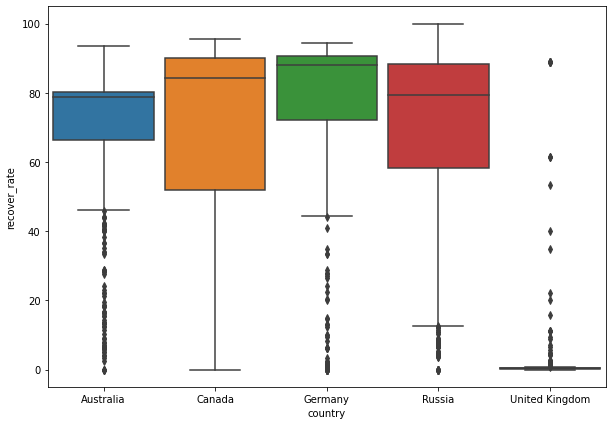

In [21]:
"""Постройте коробчатую диаграмму для признака recover_rate (отношение выздоровлений к числу 
зафиксированных случаев заболевания в процентах). Какие суждения по данному графику верны?"""

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    x='country',
    y='recover_rate',
    orient='v',
    width=0.9
)